## Import Library

In [1]:
# Import library
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import matplotlib.pyplot as plt # membuat grafik
%matplotlib inline
import seaborn as sns # membuat grafik interaktif

# Library untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('F:/Bismillah Skripsi/Dataset/dataset_ibu_hamil.csv')

## Data Understanding

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tinggi_badan             212 non-null    float64
 1   berat_badan              212 non-null    float64
 2   tekanan_darah_sistolik   212 non-null    int64  
 3   tekanan_darah_diastolik  212 non-null    int64  
 4   usia                     212 non-null    int64  
 5   paritas                  212 non-null    int64  
 6   riwayat_hipertensi       212 non-null    int64  
 7   riwayat_preeklamsia      212 non-null    int64  
 8   level_risiko             212 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 15.0+ KB


In [4]:
df.isnull().sum()

tinggi_badan               0
berat_badan                0
tekanan_darah_sistolik     0
tekanan_darah_diastolik    0
usia                       0
paritas                    0
riwayat_hipertensi         0
riwayat_preeklamsia        0
level_risiko               0
dtype: int64

In [5]:
df.head()

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
0,143.0,39.2,110,80,16,0,0,0,Rendah
1,153.0,48.0,110,70,23,0,0,0,Rendah
2,150.0,60.5,120,80,28,0,0,1,Tinggi
3,153.0,43.0,110,70,22,0,0,0,Rendah
4,150.0,41.9,100,70,21,0,0,0,Rendah


In [6]:
df.describe(include='all')

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rendah
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167
mean,153.591509,59.497170,108.410377,72.099057,29.962264,1.122642,0.023585,0.037736,NaN
std,5.215582,12.686361,10.643579,6.858392,6.395977,1.081537,0.152111,0.191008,NaN
min,135.000000,34.000000,80.000000,50.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,150.000000,50.000000,100.000000,70.000000,26.000000,0.000000,0.000000,0.000000,NaN
50%,154.000000,58.500000,110.000000,70.000000,30.000000,1.000000,0.000000,0.000000,NaN
75%,157.000000,68.000000,110.000000,80.000000,34.000000,2.000000,0.000000,0.000000,NaN


Rendah    167
Sedang     32
Tinggi     13
Name: level_risiko, dtype: int64

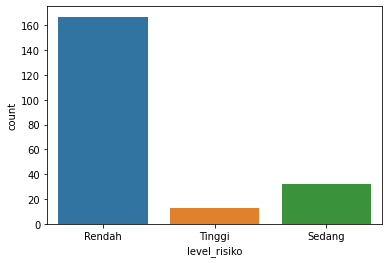

In [7]:
# Menampilkan grafik kolom 'level_risiko' menggunakan diagram batang
sns.countplot(x='level_risiko',data=df)
df['level_risiko'].value_counts()

<AxesSubplot:xlabel='usia', ylabel='paritas'>

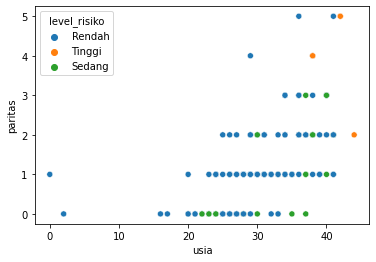

In [8]:
sns.scatterplot(x=df['usia'],y=df['paritas'],hue=df['level_risiko'])

## Preprocessing Data

In [3]:
#Import library untuk membangun model prediksi
from sklearn.preprocessing import StandardScaler

In [4]:
#Ubah kategori pada kolom level_risiko menjadi interger
df['level_risiko'].replace({"Tinggi": "3", "Sedang": "2", "Rendah" : "1"}, inplace=True)
df.head()

,tinggi_badan,berat_badan,tekanan_darah_sistolik,tekanan_darah_diastolik,usia,paritas,riwayat_hipertensi,riwayat_preeklamsia,level_risiko
0,143.0,39.2,110,80,16,0,0,0,1
1,153.0,48.0,110,70,23,0,0,0,1
2,150.0,60.5,120,80,28,0,0,1,3
3,153.0,43.0,110,70,22,0,0,0,1
4,150.0,41.9,100,70,21,0,0,0,1


In [5]:
df["level_risiko"] = df["level_risiko"].astype("int64")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tinggi_badan             212 non-null    float64
 1   berat_badan              212 non-null    float64
 2   tekanan_darah_sistolik   212 non-null    int64  
 3   tekanan_darah_diastolik  212 non-null    int64  
 4   usia                     212 non-null    int64  
 5   paritas                  212 non-null    int64  
 6   riwayat_hipertensi       212 non-null    int64  
 7   riwayat_preeklamsia      212 non-null    int64  
 8   level_risiko             212 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 15.0 KB


<AxesSubplot:>

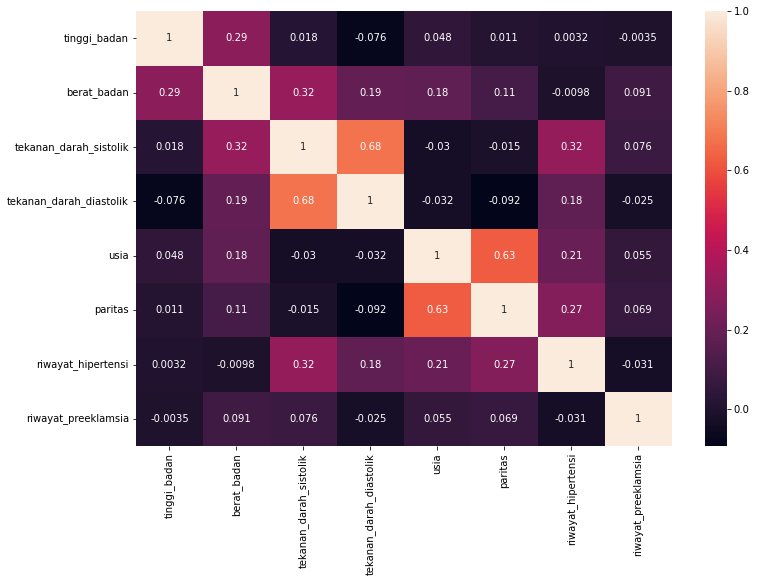

In [12]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df. corr(), annot=True)

In [6]:
# Memisahkan variabel independen dan dependen
x = df.drop (columns="level_risiko", axis=1)     # Fitur/Atribut
y = df['level_risiko']                           # Label

In [14]:
print(x)

     tinggi_badan  berat_badan  tekanan_darah_sistolik  \
0           143.0         39.2                     110   
1           153.0         48.0                     110   
2           150.0         60.5                     120   
3           153.0         43.0                     110   
4           150.0         41.9                     100   
..            ...          ...                     ...   
207         165.0         60.0                     107   
208         155.0         69.0                     110   
209         154.0         72.2                     110   
210         159.0         59.0                     120   
211         155.0         55.0                      90   

     tekanan_darah_diastolik  usia  paritas  riwayat_hipertensi  \
0                         80    16        0                   0   
1                         70    23        0                   0   
2                         80    28        0                   0   
3                         70    22 

In [15]:
print(y)

0      1
1      1
2      3
3      1
4      1
      ..
207    1
208    1
209    1
210    2
211    1
Name: level_risiko, Length: 212, dtype: int64


In [7]:
#Standarisasi data
scaler = StandardScaler()

In [8]:
scaler.fit(x)

StandardScaler()

In [9]:
standarized_data = scaler.transform(x)

In [10]:
print(standarized_data)

[[-2.03554998 -1.60370734  0.14970388 ... -1.04046264 -0.15541747
  -0.19802951]
 [-0.1136804  -0.90840722  0.14970388 ... -1.04046264 -0.15541747
  -0.19802951]
 [-0.69024127  0.07923499  1.09146125 ... -1.04046264 -0.15541747
   5.04975247]
 ...
 [ 0.07850656  1.00366811  0.14970388 ... -0.11366399 -0.15541747
  -0.19802951]
 [ 1.03944135 -0.03928207  1.09146125 ... -1.04046264 -0.15541747
  -0.19802951]
 [ 0.27069352 -0.35532758 -1.73381085 ...  0.81313466 -0.15541747
  -0.19802951]]


In [11]:
#Masukan hasil standarisasi data ke variabel X
X = standarized_data
Y = df['level_risiko']

In [12]:
print(X)

[[-2.03554998 -1.60370734  0.14970388 ... -1.04046264 -0.15541747
  -0.19802951]
 [-0.1136804  -0.90840722  0.14970388 ... -1.04046264 -0.15541747
  -0.19802951]
 [-0.69024127  0.07923499  1.09146125 ... -1.04046264 -0.15541747
   5.04975247]
 ...
 [ 0.07850656  1.00366811  0.14970388 ... -0.11366399 -0.15541747
  -0.19802951]
 [ 1.03944135 -0.03928207  1.09146125 ... -1.04046264 -0.15541747
  -0.19802951]
 [ 0.27069352 -0.35532758 -1.73381085 ...  0.81313466 -0.15541747
  -0.19802951]]


In [13]:
print(Y)

0      1
1      1
2      3
3      1
4      1
      ..
207    1
208    1
209    1
210    2
211    1
Name: level_risiko, Length: 212, dtype: int64


## Membagi data training dan data testing

In [14]:
#Bagi menjadi data training 80% dan data testing 20%
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(169, 8) (43, 8) (169,) (43,)


## Uji Metode Machine Learning

In [15]:
#Import library untuk mengukur model dari tiap metode yang diuji
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,precision_score,roc_curve

### K-Nearest Neighbor

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

In [31]:
models = {'KNN': KNeighborsClassifier()}

modelNames = ['KNN']

trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)
    
    print(m) 
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")
    
    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
  
    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("") 
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

KNN
Hasil score data training:  90.53254437869822
Hasil score data testing:  86.04651162790698
 
Confussion Matrix: 
 [[33  5  0]
 [ 1  1  0]
 [ 0  0  3]]
Accuracy :  0.85
Precision:  0.16666666666666666
Recall   :  0.5
F1 score :  0.25
Specificity :  0.868421052631579

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.87      0.92        38
           2       0.17      0.50      0.25         2
           3       1.00      1.00      1.00         3

    accuracy                           0.86        43
   macro avg       0.71      0.79      0.72        43
weighted avg       0.94      0.86      0.89        43




### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier                         

In [17]:
models = {'Decision Tree': DecisionTreeClassifier (criterion='gini',random_state=42,max_depth=13)}

modelNames = ['Decision Tree']

trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)
    
    print(m) 
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")
    
    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
  
    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("") 
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

Decision Tree
Hasil score data training:  100.0
Hasil score data testing:  95.34883720930233
 
Confussion Matrix: 
 [[33  1  0]
 [ 1  5  0]
 [ 0  0  3]]
Accuracy :  0.95
Precision:  0.8333333333333334
Recall   :  0.8333333333333334
F1 score :  0.8333333333333334
Specificity :  0.9705882352941176

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.97      0.97        34
           2       0.83      0.83      0.83         6
           3       1.00      1.00      1.00         3

    accuracy                           0.95        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.95      0.95      0.95        43




### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier 

In [36]:
models = {'Random Forest': RandomForestClassifier(criterion = 'entropy', random_state=42,
                                                  n_estimators= 500, max_depth=13)
         }

modelNames = ['Random Forest']

trainScores = []
accuracyScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, Y_train)
    
    print(m) 
    train_score = model.score(X_train, Y_train)
    print('Hasil score data training: ', train_score*100)
    trainScores.append(train_score*100)

    test_score = model.score(X_test, Y_test)
    print('Hasil score data testing: ', test_score*100)
    testScores.append(test_score*100)
    print(" ")
    
    Y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(Y_predictions, Y_test)

    print('Confussion Matrix: \n', conf_matrix)

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, Y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy2  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
  
    print('Accuracy : ', accuracy2)
    print('Precision: ', precision)
    print('Recall   : ', recall)
    print('F1 score : ', f1score)
    print('Specificity : ', specificity)
    print("") 
    print('Classification Report: \n', classification_report(predictions, Y_test))
    print("")

Random Forest
Hasil score data training:  100.0
Hasil score data testing:  93.02325581395348
 
Confussion Matrix: 
 [[33  2  0]
 [ 1  4  0]
 [ 0  0  3]]
Accuracy :  0.925
Precision:  0.6666666666666666
Recall   :  0.8
F1 score :  0.7272727272727272
Specificity :  0.9428571428571428

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.94      0.96        35
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         3

    accuracy                           0.93        43
   macro avg       0.88      0.91      0.89        43
weighted avg       0.94      0.93      0.93        43




## Uji Coba Model Terbaik

In [19]:
#Diketahui dari hasil diatas bahwa Decision Tree merupakan model terbaik
tree = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [20]:
X_train_prediction = tree.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Akurasi data training =", train_data_accuracy)

Akurasi data training = 1.0


In [21]:
X_test_prediction = tree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Akurasi data testing =", test_data_accuracy)

Akurasi data testing = 0.9534883720930233


In [26]:
#Uji coba menggunakan dataset
input_data = (150, 80, 140, 90, 20, 0, 1, 0)
input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction =  tree.predict(std_data)

# ubah class hasil prediksi menjadi interger agar dapat dibaca oleh model
predicted_class = int(prediction[0])

if predicted_class == 1:
    print('Anda memiliki resiko rendah untuk terkena preeklamsia')
elif predicted_class == 2:
    print('Anda memiliki resiko sedang untuk terkena preeklamsia')
else:
    print('Anda memiliki resiko tinggi untuk terkena preeklamsia')

# Hasil level risiko yang diprediksi
print('Predicted Values:', prediction)

[[-0.69024127  1.61995685  2.97497598  2.61625666 -1.56126945 -1.04046264
   6.43428318 -0.19802951]]
Anda memiliki resiko tinggi untuk terkena preeklamsia
Predicted Values: [3]


## Simpan Model Terbaik

In [24]:
import pickle #library untuk menyimpan model dalam bentuk SAV

In [25]:
filename = 'preeklamsia_model.sav'
pickle.dump(tree, open(filename, 'wb'))